# Set ups

In [3963]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3964]:
df = pd.read_csv('bank-full.csv',sep = ';',header = 0)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Part I Data Exploration
เป็นการสำรวจ data set ที่ได้มา สำรวจข้อมูลของแต่ละ attributes ว่าข้อมูลไหนที่ควรนำมาวิเคราะห์ต่อ  

In [3965]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Data set มีทั้งหมด 17 attributes โดยแบ่งเป็น 
- Input 16 attributes 
- Output 1 attribute

และ data set นี้ไม่มีข้อมูลที่เป็น missing value

In [3966]:
df.shape


(45211, 17)

In [3967]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


แยกข้อมูลประเภท categorical

In [3968]:
categorical_features = [f for f in df.columns if ((df[f].dtypes=='O') & (f not in ['y']))]
print('There are ' + str(len(categorical_features)) + ' attributes as a categorical')
categorical_features

There are 9 attributes as a categorical


['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

----
Data ที่เป็น categorical features รวม output ประกอบด้วยข้อมูล ดังนี้

In [3969]:
p = 1
for col in df.select_dtypes(include='object').columns:
    print(str(p) + '.' + col + ' are ' + str(len(df[col].unique())) + ' categories ', end = '')
    print(df[col].unique())
    p+=1

1.job are 12 categories ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
2.marital are 3 categories ['married' 'single' 'divorced']
3.education are 4 categories ['tertiary' 'secondary' 'unknown' 'primary']
4.default are 2 categories ['no' 'yes']
5.housing are 2 categories ['yes' 'no']
6.loan are 2 categories ['no' 'yes']
7.contact are 3 categories ['unknown' 'cellular' 'telephone']
8.month are 12 categories ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
9.poutcome are 4 categories ['unknown' 'failure' 'other' 'success']
10.y are 2 categories ['no' 'yes']


* ข้อมูลที่เป็น job และ month เป็นข้อมูลที่มี categories มากที่สุด

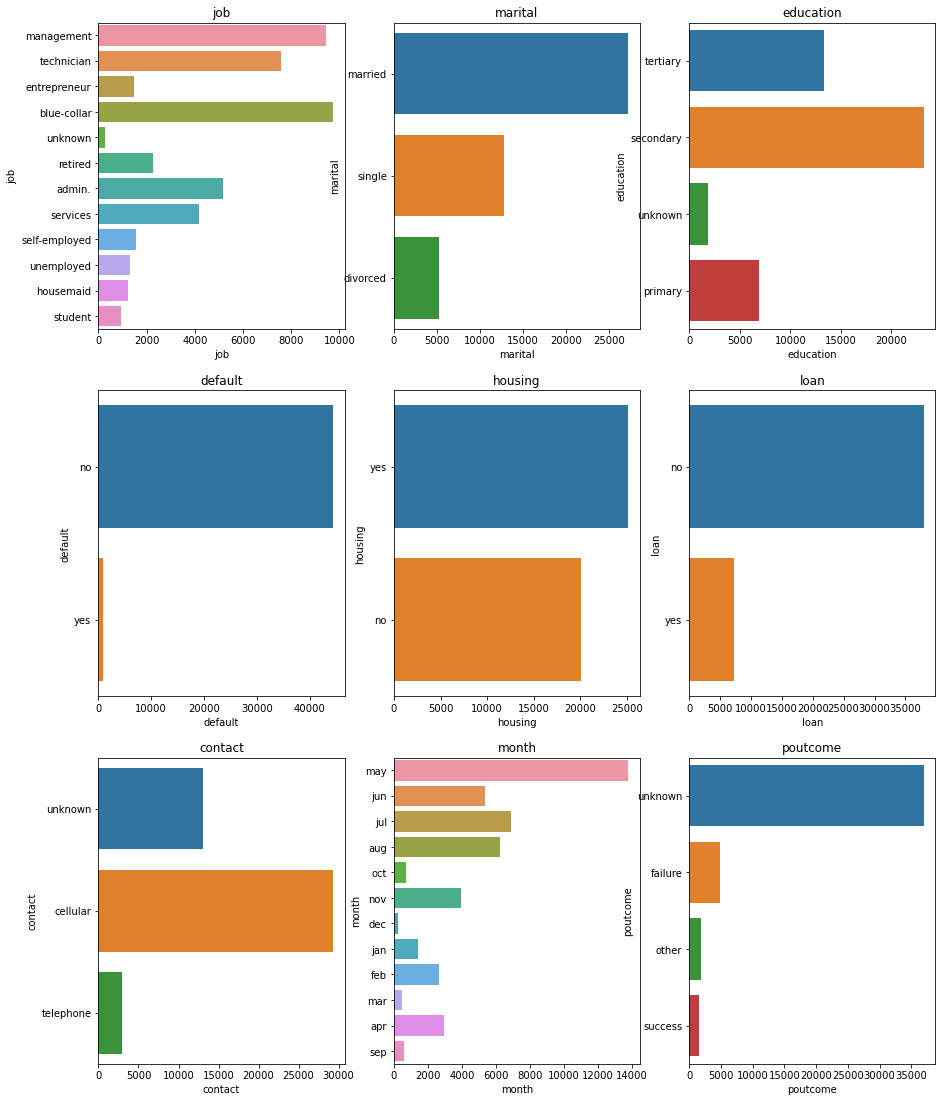

In [3970]:
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for c in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=c,data=df)
    plt.xlabel(c)
    plt.title(c)
    
    plotnumber+=1
plt.show()

- job มีข้อมูลของผู้ที่ทำอาชีพ blue-collar และ management มากที่สุด และ student น้อยที่สุด 
- marital จะพบว่าคนส่วนใหญ่แต่งงานแล้ว และข้อมูลที่น้อยที่สุดคือคนที่หย่าร้าง
- education ของมูลของคนที่กำลังศึกษาระดับมัธยมศึกษาจะมีมากที่สุด และ ผู้ที่ศึกษาระดับประถมศึกษามีน้อยที่สุด
- default ข้อมูลเกิน 90% เป็นข้อมูงของผู้ที่ไม่มี credit
- housing ข้อมูลมีขนาดที่ไม่ต่างกันมาก แต่ผู้ที่กู้เงินซื้อบ้านมีมากกว่า
- loan พบว่าคนส่วนใหญ่จะกู้เงิน
- contact ข้อมูลส่วนใหญ่จะเป็นของผู้ที่ติดต่อผ่าน cellular
- month จะเห็นได้ชัดว่าข้อมูลในเดือนพฤษภาคมจะมีมากที่สุดเมื่อเทียบกับทุกๆเดือนและเดือนธันว่าคมมีข้อมูลน้อยที่สุด
- poutcome จะพบว่าผลของแคมเปญก่อนหน้านี้มีโอกาสไม่ประสบผลสำเร็จมากกว่า 

-----
กราฟแสดงความสัมพันธ์ระหว่าง features กับ outlook ของข้อมูลประเภท categorical

In [3971]:
# import matplotlib.pyplot as plt
# for c in categorical_features:
#     sns.catplot(x='y', col=c, kind='count', data= df)
# plt.show()

เมื่อเทียบแต่ละ features กับ outlook แล้วได้ผลสรุปดังนี้
- job จะสังเกตเห็นว่าแม้ management ข้อมูลมาก แต่ผู้ที่สนใจแคมเปญก็ยังมากที่สุดเมื่อเทียบกับข้อมูลอื่น
- marital จะพบว่าผู้ที่แต่งงานแล้วมีแนวโน้มที่จะสนใจแคมเปญนี้มากที่สุด
- education พบว่านักเรียนมัธยมที่มีข้อมูลมากที่สุด ก็มีแนมโน้วที่จะสนใจแคมเปญนี้มากที่สุดเหมือนกัน
- default สำหรับผู้ที่มี credit อยู่แล้วก็จะสนใจแคมเปญนี้ แต่เนื่องจากข้อมูลของผู้ที่ไม่สนใจแคมเปญนี้มีมากกว่าเมื่อเมื่อกับผู้ที่สนใจ ในการ predict จึงทำให้โอกาสที่ผู้ที่ผู้ที่ไม่มี credit มาก่อนจะไม่สนใจแคปเปญนี้ ข้อมูลนี้จึงจะไม่เอาไปใช้ในการ predict ต่อ
- housing พบว่าผู้ที่มีซื้อบ้านจากการกู้เงินจะมีแนวโน้มที่จะไม่สนใจแคปเปญนี้ แต่กลับกันผู้ที่ไม่ได้กู้เงินจะสนใจมากกว่า
- loan ผู้ที่ไม่มีเงินกู้จะไม่สนใจแคปเปญนี้ เมื่อเทียบกับปริมาณข้อมูลแล้วแนวโน้มสำหรับผู้ที่ไม่สนใจจะมีมากกว่า 
- contact สำหรับผู้มีใช้ cellular จะมีความสนใจแคปเปญนี้มากเมื่อเทียบกับผู้ที่ใช้ telephone 
- month พบว่ามีผู้ที่สนใจแคมเปญในแต่ละเดือนที่ไม่ต่างกันมาก แต่ข้อมูลในเดือนพฤษภาคมจะมากเมื่อเทียบกับเดือนอื่นๆทำให้ผู้ที่ไม่สนใจแคปเปญนี้ก็มากตามไปด้วย
- poutcome ผู้ที่สนใจแคมเปญนี้ในรอบหน้าก่อน มีแนวโน้มที่จะสนใจแคมเปญนี้อีก

In [3972]:
for categorical_feature in categorical_features:
    print(df.groupby(['y',categorical_feature]).size())

y    job          
no   admin.           4540
     blue-collar      9024
     entrepreneur     1364
     housemaid        1131
     management       8157
     retired          1748
     self-employed    1392
     services         3785
     student           669
     technician       6757
     unemployed       1101
     unknown           254
yes  admin.            631
     blue-collar       708
     entrepreneur      123
     housemaid         109
     management       1301
     retired           516
     self-employed     187
     services          369
     student           269
     technician        840
     unemployed        202
     unknown            34
dtype: int64
y    marital 
no   divorced     4585
     married     24459
     single      10878
yes  divorced      622
     married      2755
     single       1912
dtype: int64
y    education
no   primary       6260
     secondary    20752
     tertiary     11305
     unknown       1605
yes  primary        591
     secondary     2

แยกข้อมูลประเภท numerical

In [3973]:
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['y']))]
print('There are ' + str(len(numerical_features)) + ' attributes as a numrical')

df[numerical_features].head()

There are 7 attributes as a numrical


,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


ข้อมูลที่เป็นประเภท numerical ประกอบด้วยดังนี้
- age
- balance
- day
- duration
- campaign
- pdays
- previous

-----
กราฟความสัมพันธ์ระหว่าง features กับ features ของข้อมูลประเภท numerical

In [3974]:
# import seaborn as sns
# sns.pairplot(df,hue = 'y')

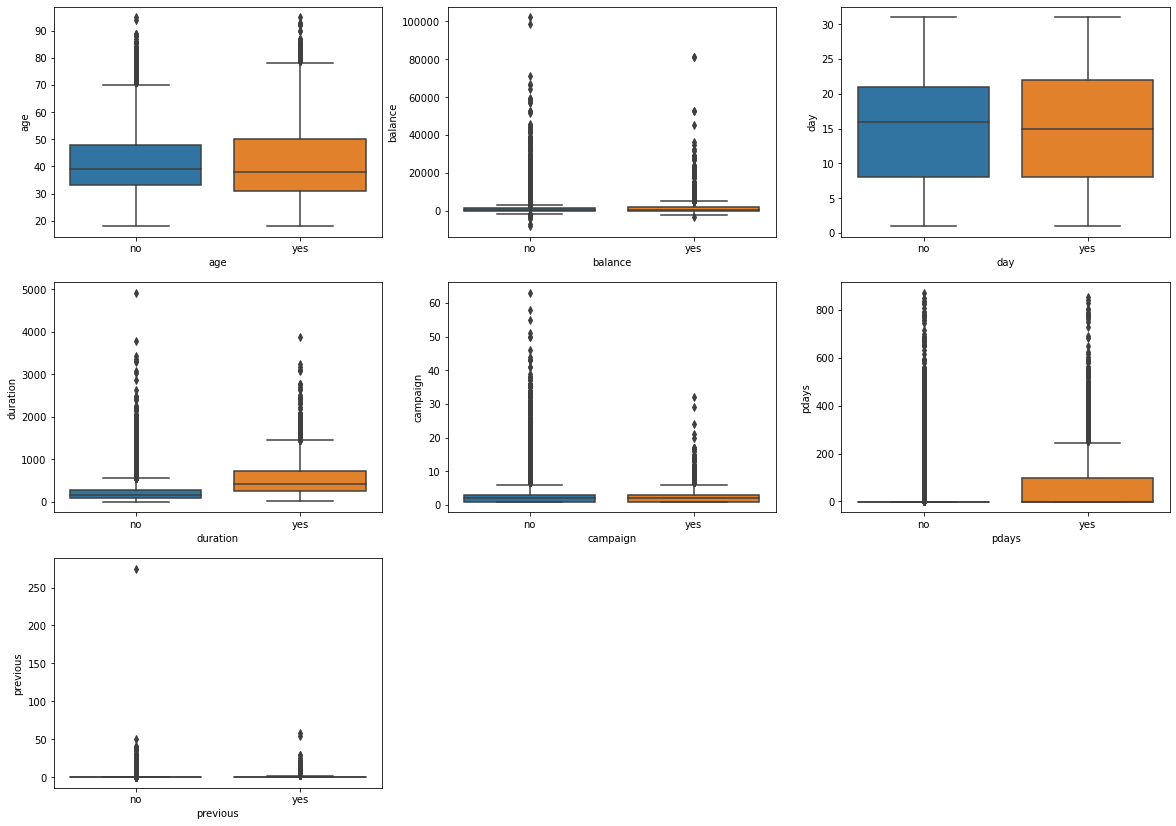

In [3975]:
#boxplot to show target distribution with respect numerical features
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="y", y= df[feature], data=df)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

In [3976]:
# df.duration.plot.hist()
# sns.barplot(df.pdays)

In [3977]:
# cor_mat=df.corr()
# fig = plt.figure(figsize=(15,7))
# sns.heatmap(cor_mat,annot=True)

-----
ปริมาณข้อมูลของ output

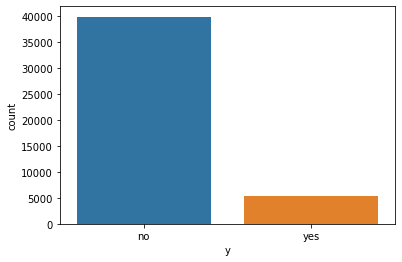

In [3978]:
sns.countplot(x='y',data=df)
plt.show()

In [3979]:
df['y'].groupby(df['y']).count()

y
no     39922
yes     5289
Name: y, dtype: int64

จะพบว่าข้อมูลไม่สมดุลกันโดยจะเอนเอียงไปทางคำตอบ no มากกว่า 80% เมื่อเทียบกับข้อมูลทั้งหมด ดังนั้น เมื่อมี input ใหม่เข้ามามีโอกาสที่โมเดลจะทำนายว่าเป็น no มากกว่า yes ดังนั้น ในการโมเดลจะเน้นไปในการวิเคราะห์ข้อมูลที่ทำให้โมเดลทำนายว่าเป็น yes

# Past II Data Preprocessing 
### Raw data


ลองนำ data set ที่ยังไม่ผ่านการ preprocessing หรือ features selection นี้เข้าโมเดลเพื่อดูผลลัพธ์ของโมเดล เพื่อที่จากนี้จะได้นำเลขที่ได้นี้เป็นค่าในการเปรียบเทียบโมเดลในขั้นตอนที่ทำ preprocessing หรือ features selection

In [3980]:
df_b = df.copy()

In [3981]:
df_b.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3982]:
for col in 'y':
    df_b[col]=df_b[col].apply(lambda x : 1 if x == 'yes' else 0)
df_b = pd.get_dummies(df_b)
df_b.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


ทำการเปลี่ยน catagorical ของ output 
จาก yes เป็น 1 
จาก no  เป็น 0

In [3983]:
x_b = df_b.loc[:,df_b.columns != 'y']
x_b = df_b[x_b.columns].values
y_b = df_b['y'].values


แยก input กับ output ออกจากกันเพื่อที่เราจะนำไปเข้าโมเดล

In [3984]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler,MaxAbsScaler

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_b)
x_train_b,x_test_b,y_train_b,y_test_b = train_test_split(x_scaled,y_b,test_size = 0.2)


เนื่องจากข้อมูลมีค่ามาก เราจึงทำการสเกลข้อมูลด้วยการใช้ minmaxscaler จากนั้นทำการแบ่งข้อมูลเพื่อไปทำการ train กับ test โดยแบ๋งเป็น train 80% และ test 20%

In [3985]:
print("X_train shape", x_train_b.shape)
print("y_train shape", y_train_b.shape)
print("X_test shape", x_test_b.shape)
print("y_test shape", y_test_b.shape)

X_train shape (36168, 51)
y_train shape (36168,)
X_test shape (9043, 51)
y_test shape (9043,)


In [3986]:
from sklearn.linear_model import LogisticRegression
model_logistic = LogisticRegression(solver='lbfgs', max_iter=1000)
model_logistic.fit(x_train_b,y_train_b)

LogisticRegression(max_iter=1000)

นำ data เข้าสู่โมเดล Logistic regression

In [4029]:
#Predict on training set
y_pred_train = model_logistic.predict(x_train_b)
#Predict on testing set
y_pred_test = model_logistic.predict(x_test_b)

In [3988]:
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix
print("Classification report \n=======================")
print(classification_report(y_true=y_train_b, y_pred=y_pred_train))
print("Confusion matrix \n=======================")
print(confusion_matrix(y_true=y_train_b, y_pred=y_pred_train))

Classification report 
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     31962
           1       0.66      0.32      0.43      4206

    accuracy                           0.90     36168
   macro avg       0.79      0.65      0.69     36168
weighted avg       0.89      0.90      0.89     36168

Confusion matrix 
[[31260   702]
 [ 2863  1343]]


c:\Users\TUF\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


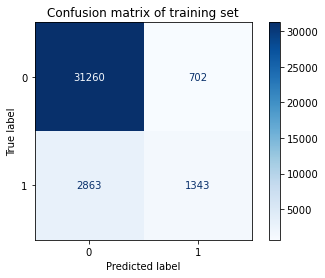

In [3989]:
# Plot confusion matrix of training set
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_logistic,
                      x_train_b,
                      y_train_b,
                      display_labels=list(set(y_test_b)),
                      cmap=plt.cm.Blues) 
plt.title('Confusion matrix of training set')
plt.show() 

### 1 Data Processing

In [3990]:
df2=df.copy()

In [3991]:
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3992]:
df2.groupby(['y','default']).size()

y    default
no   no         39159
     yes          763
yes  no          5237
     yes           52
dtype: int64

จากการสังเกตข้อมูลแล้ว ข้อมูลเอียงเอนไปทาง no มากกว่า 80% เราจึงทำการ drop data นี้ เนื่องจากมันจะส่งส่งทำให้การคำนวณมีโอกาสให้คำตอบ no มากขึ้น

In [3993]:
df2.drop(['default'],axis=1, inplace=True)

In [3994]:
df2.groupby(['y','duration']).size()

y    duration
no   0            3
     1            2
     2            3
     3            4
     4           15
                 ..
yes  3094         1
     3102         1
     3183         1
     3253         1
     3881         1
Length: 2627, dtype: int64

ค่า duration เป็นระยะเวลาที่คุยกับลูกค้า ซึ่งจากข้อมูลแสดงให้เห็นว่าถ้าคุยนานลูกค้ามีโอกาสที่จะสนใจแคปเปญ แต่ข้อมูลส่วยใหญ่แสดงถึงว่าไม่ได้คุยดังนั้นข้อมูลถึงเอียงไปทาง no มากกว่า ดังนั้น เราจึงทำการ drop ออก

In [3995]:
df2.drop(['duration'],axis=1, inplace=True)

In [3997]:
df2.groupby(['y','pdays']).size()

y    pdays
no   -1       33570
      1           9
      2          35
      3           1
      4           1
              ...  
yes   804         1
      805         1
      828         1
      842         1
      854         1
Length: 914, dtype: int64

ข้อมูลนี้มีค่าที่เป็น -1 มาก เราจึงไม่ได้รู้อะไรเกี่ยวกับข้อมูลนี้เลย เราจึงทำการ drop ออกไป

In [3998]:
df2.drop(['pdays'],axis=1, inplace=True)

In [3999]:
df2.groupby(['y','balance']).size()

y    balance
no   -8019      1
     -6847      1
     -4057      1
     -3372      1
     -3313      1
               ..
yes   34646     1
      36252     1
      45248     1
      52587     2
      81204     2
Length: 9258, dtype: int64

ข้อมูลนี้ มี outlier เราจึงตัดข้อมูลที่เป็น outlier ออก

In [4000]:
df3 = df2[df2['balance'] < 77000]

In [4001]:
df3.groupby(['y','previous']).size()

y    previous
no   0           33568
     1            2189
     2            1650
     3             848
     4             543
                 ...  
yes  26              1
     29              1
     30              1
     55              1
     58              1
Length: 66, dtype: int64

In [4002]:
df4 = df3[df3['previous'] < 100]
df4.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,campaign,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,no,unknown,5,may,1,0,unknown,no
1,44,technician,single,secondary,29,yes,no,unknown,5,may,1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,yes,unknown,5,may,1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,no,unknown,5,may,1,0,unknown,no
4,33,unknown,single,unknown,1,no,no,unknown,5,may,1,0,unknown,no


ข้อมูลนี้ มี outlier เราจึงตัดข้อมูลที่เป็น outlier ออก

### Train


In [4003]:
df5 = df4.copy()
for col in df5.loc[:,df5.columns == 'y']:
    df5[col]=df5[col].apply(lambda x : 1 if x == 'yes' else 0)
df5 = pd.get_dummies(df5)
df5.head()


,age,balance,day,campaign,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [4004]:
x = df5.loc[:,df5.columns != 'y']
x = df5[x.columns].values
y = df5['y'].values
y

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [4005]:
scaler1 = MinMaxScaler()
x_scaled1 = scaler1.fit_transform(x)
x_train,x_test,y_train,y_test = train_test_split(x_scaled1,y,test_size = 0.2)

In [4006]:
print("X_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", x_test.shape)
print("y_test shape", y_test.shape)

X_train shape (36164, 47)
y_train shape (36164,)
X_test shape (9042, 47)
y_test shape (9042,)


In [4007]:
model_logistic1 = LogisticRegression(solver='lbfgs', max_iter=1000)
model_logistic1.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [4008]:
#Predict on training set
y_pred_train1 = model_logistic1.predict(x_train)
#Predict on testing set
y_pred_test1 = model_logistic1.predict(x_test)

In [4009]:
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix
print("Classification report \n=======================")
print(classification_report(y_true=y_train, y_pred=y_pred_train1))
print("Confusion matrix \n=======================")
print(confusion_matrix(y_true=y_train, y_pred=y_pred_train1))

Classification report 
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     31897
           1       0.65      0.18      0.28      4267

    accuracy                           0.89     36164
   macro avg       0.77      0.58      0.61     36164
weighted avg       0.87      0.89      0.86     36164

Confusion matrix 
[[31474   423]
 [ 3491   776]]


In [4010]:
# Classification report of test set
print("Classification report \n=======================")
print(classification_report(y_true=y_test, y_pred=y_pred_test1))
print("Confusion matrix \n=======================")
print(confusion_matrix(y_true=y_test, y_pred=y_pred_test1))



Classification report 
              precision    recall  f1-score   support

           0       0.91      0.99      0.94      8022
           1       0.64      0.19      0.29      1020

    accuracy                           0.90      9042
   macro avg       0.77      0.59      0.62      9042
weighted avg       0.88      0.90      0.87      9042

Confusion matrix 
[[7910  112]
 [ 825  195]]


### 2 Data Processing

In [4011]:
df6=df.copy()

In [4012]:
df6.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4015]:
df6.groupby(['y','duration']).size()

y    duration
no   0            3
     1            2
     2            3
     3            4
     4           15
                 ..
yes  3094         1
     3102         1
     3183         1
     3253         1
     3881         1
Length: 2627, dtype: int64

In [4016]:
df6.drop(['duration'],axis=1, inplace=True)

In [4017]:
df6.groupby(['y','pdays']).size()

y    pdays
no   -1       33570
      1           9
      2          35
      3           1
      4           1
              ...  
yes   804         1
      805         1
      828         1
      842         1
      854         1
Length: 914, dtype: int64

In [4018]:
df6.drop(['pdays'],axis=1, inplace=True)

In [4019]:
df6.drop(['balance'],axis=1, inplace=True)

### 2 Train


In [4020]:
df7 = df6.copy()
for col in df7.loc[:,df7.columns == 'y']:
    df7[col]=df7[col].apply(lambda x : 1 if x == 'yes' else 0)
df7 = pd.get_dummies(df7)
df7.head()


,age,day,campaign,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,5,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
1,44,5,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,5,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3,47,5,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,33,5,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [4021]:
x2 = df7.loc[:,df7.columns != 'y']
x2 = df7[x2.columns]
y2 = df7['y']


In [4022]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

selector = SelectKBest(chi2, k=7)  
x_new = selector.fit(x2,y2)  
col = selector.get_support(indices=True)   #all indices are saved in col.
x_new = x2.iloc[:,col]
x_new.head()

,campaign,previous,contact_unknown,month_mar,month_oct,month_sep,poutcome_success
0,1,0,1,0,0,0,0
1,1,0,1,0,0,0,0
2,1,0,1,0,0,0,0
3,1,0,1,0,0,0,0
4,1,0,1,0,0,0,0


In [4023]:
x_train2,x_test2,y_train2,y_test2 = train_test_split(x_new,y2,test_size = 0.2)

In [4024]:
model_logistic2 = LogisticRegression(solver='lbfgs', max_iter=1000)
model_logistic2.fit(x_train2,y_train2)

LogisticRegression(max_iter=1000)

In [4025]:
#Predict on training set
y_pred_train2 = model_logistic2.predict(x_train2)
#Predict on testing set
y_pred_test2 = model_logistic2.predict(x_test2)

In [4026]:
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix
print("Classification report \n=======================")
print(classification_report(y_true=y_train2, y_pred=y_pred_train2))
print("Confusion matrix \n=======================")
print(confusion_matrix(y_true=y_train2, y_pred=y_pred_train2))

Classification report 
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     31927
           1       0.65      0.18      0.29      4241

    accuracy                           0.89     36168
   macro avg       0.78      0.58      0.61     36168
weighted avg       0.87      0.89      0.87     36168

Confusion matrix 
[[31517   410]
 [ 3468   773]]


In [4027]:
# Classification report of test set
print("Classification report \n=======================")
print(classification_report(y_true=y_test2, y_pred=y_pred_test2))
print("Confusion matrix \n=======================")
print(confusion_matrix(y_true=y_test2, y_pred=y_pred_test2))



Classification report 
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7995
           1       0.64      0.19      0.29      1048

    accuracy                           0.89      9043
   macro avg       0.77      0.59      0.62      9043
weighted avg       0.87      0.89      0.87      9043

Confusion matrix 
[[7882  113]
 [ 850  198]]


# branch mark

# Test Train

In [4028]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

confusion_matrix(y_predict0,y_test0)
print(classification_report(y_test0, y_predict0,target_names=['no','yes']))

              precision    recall  f1-score   support

          no       0.91      0.98      0.94      7994
         yes       0.62      0.24      0.35      1049

    accuracy                           0.89      9043
   macro avg       0.76      0.61      0.64      9043
weighted avg       0.87      0.89      0.87      9043



# Data Preprocessing 2